# Word embeddings

### Resources

- Word2vec (Mikolov et al., 2013): https://code.google.com/archive/p/word2vec/
- Fasttext: http://www.fasttext.cc/ (+sub-word information, +multilingual)
- Glove (Pennington, Socher, Manning, 2014): http://nlp.stanford.edu/projects/glove/



Gensim documentation: https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

Embeddings visualizer: https://projector.tensorflow.org/


## Loading and using word embeddings

In [1]:
import gensim

In [2]:
# Show all available models in gensim-data
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
# Download the "GloVe 25" embeddings
embeddings_twitter = gensim.downloader.load('glove-twitter-200')
# embeddings = gensim.downloader.load('glove-twitter-25')

In [4]:
embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [5]:
print(len(embeddings.index2word))
print(len(embeddings_twitter.index2word))

999999
1193514


In [6]:
embeddings.get_vector('cat')

array([ 4.7426e-02, -4.2203e-02,  2.8491e-02, -4.4481e-02, -2.6467e-02,
        3.3557e-02,  1.7173e-01, -1.4773e-01,  7.1133e-02,  3.8385e-02,
       -7.9921e-02, -1.3236e-03,  1.6185e-01, -1.6389e-01, -6.5456e-02,
        2.7030e-02,  1.2193e-01, -7.1632e-02,  7.9642e-02, -1.4602e-01,
        1.0369e-02, -1.0468e-01,  3.6734e-02,  7.9116e-02,  1.8241e-01,
       -2.4902e-03,  1.3818e-02,  1.2378e-01,  1.7348e-04,  1.6646e-02,
       -1.3513e-02, -7.5532e-02,  1.0060e-01,  7.1226e-02, -2.7468e-02,
       -7.8517e-02,  3.3769e-02, -1.6082e-01, -2.2747e-02, -1.3238e-01,
        1.1198e-02, -1.2838e-01, -5.8910e-02, -5.1399e-02,  3.9177e-02,
        5.8243e-02,  2.2071e-02,  7.1876e-02,  2.8166e-02, -1.8918e-02,
        3.4445e-02,  1.5664e-01,  6.9836e-02, -2.0858e-01,  2.4413e-03,
       -8.9110e-02, -6.0705e-02,  6.5106e-02, -8.3036e-02,  1.7491e-02,
       -3.4527e-02, -2.5026e-01,  1.8777e-01, -3.6235e-02,  1.2452e-01,
        2.4356e-02, -4.4517e-03,  5.5572e-02, -8.6161e-03, -1.61

In [7]:
embeddings.most_similar('cat')

[('cats', 0.8368596434593201),
 ('housecat', 0.7674711346626282),
 ('-cat', 0.7602992057800293),
 ('dog', 0.7502298355102539),
 ('kitten', 0.7480818033218384),
 ('feline', 0.7353992462158203),
 ('super-cat', 0.7305205464363098),
 ('supercat', 0.7163283824920654),
 ('pet', 0.7090284824371338),
 ('moggy', 0.7057286500930786)]

In [8]:
embeddings_twitter.most_similar('cat')

[('dog', 0.8324302434921265),
 ('cats', 0.7685185670852661),
 ('kitty', 0.7504456043243408),
 ('kitten', 0.7489697933197021),
 ('pet', 0.7319862246513367),
 ('puppy', 0.7023192048072815),
 ('dogs', 0.7016381621360779),
 ('animal', 0.6421107053756714),
 ('bear', 0.6309186220169067),
 ('meow', 0.6304775476455688)]

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(
    embeddings.get_vector('cat').reshape(1,-1), 
    embeddings.get_vector('kitten').reshape(1,-1)
    )[0][0]

0.7480817

In [10]:
embeddings.similarity('cat', 'kitten')

0.74808174

In [11]:
embeddings.similarity('cat', 'puppy')

0.6651119

In [12]:
embeddings.closer_than('cat', 'puppy')

['dog',
 'cats',
 'Cat',
 'pet',
 'kitten',
 'feline',
 'kitty',
 'subcat',
 'felines',
 'beagle',
 'sub-cat',
 'tomcat',
 'moggy',
 'housecat',
 'supercat',
 'moggie',
 'she-cat',
 're-cat',
 'cat-',
 'kittypet',
 'super-cat',
 '-cat']

#### Synonymy vs relatedness

In [13]:
embeddings.similarity('uncle', 'sister')

0.7174434

In [14]:
embeddings_twitter.similarity('uncle', 'sister')

0.6477544

In [15]:
embeddings_twitter.similarity('sibling', 'sister')

0.517647

In [16]:
embeddings_twitter.similarity('good', 'bad')

0.7983508

In [17]:
embeddings.similarity('good', 'bad')

0.8503089

In [18]:
embeddings.similarity('sister', 'sibling')

0.76012087

In [19]:
embeddings.similarity('sister', 'mother')

0.76116526

In [20]:
embeddings.similarity('Monday', 'Sunday')

0.85126

#### Word analogies

In [21]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9390855431556702),
 ('queen-mother', 0.9078598618507385),
 ('king-', 0.8828967213630676),
 ('queen-consort', 0.882541835308075),
 ('child-king', 0.8680858016014099),
 ('monarch', 0.8670082688331604),
 ('ex-queen', 0.8654636740684509),
 ('princess', 0.8628991842269897),
 ('queen-', 0.8613532781600952),
 ('boy-king', 0.8604660630226135)]

In [22]:
# Rome - Italy + France
embeddings.most_similar_cosmul(positive=['Rome', 'France'], negative=['Italy'])

[('Paris', 0.9433913826942444),
 ('Meaux', 0.8968006372451782),
 ('Avignon', 0.8785353302955627),
 ('Saint-Denis', 0.8744451403617859),
 ('Rouen', 0.8729321956634521),
 ('Lyon', 0.8724958300590515),
 ('Louville', 0.8714753985404968),
 ('Toulouse', 0.8713098168373108),
 ('Beauvais', 0.8704253435134888),
 ('Blois', 0.8698782920837402)]

In [23]:
# pasta - Italian + Romanian
embeddings.most_similar_cosmul(positive=['pasta', 'Romanian'], negative=['Italian'])

[('polenta', 0.7852737307548523),
 ('bulgar', 0.7823465466499329),
 ('bulgur', 0.769961953163147),
 ('babka', 0.7660169005393982),
 ('soup', 0.7643554210662842),
 ('mămăligă', 0.7633044719696045),
 ('cereal', 0.7588523626327515),
 ('pelmeni', 0.758571445941925),
 ('masa', 0.7559653520584106),
 ('tin', 0.7554839253425598)]

In [24]:
# cat - dog + puppy
embeddings.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9267359972000122),
 ('kitty', 0.8846306204795837),
 ('cats', 0.8722013831138611),
 ('kittens', 0.8703644871711731),
 ('kitties', 0.8619921803474426),
 ('kitteh', 0.8562358021736145),
 ('housecat', 0.855234682559967),
 ('moggy', 0.8512866497039795),
 ('-cat', 0.8492761850357056),
 ('moggie', 0.847593367099762)]

In [25]:
# green - blue + red
embeddings.most_similar_cosmul(positive=['purple', 'yellow'], negative=['blue'])

[('orange', 0.9281181693077087),
 ('green-yellow', 0.9220715761184692),
 ('pink', 0.9197202920913696),
 ('orange-yellow', 0.9192143082618713),
 ('white-yellow', 0.9170408248901367),
 ('red-yellow', 0.9141272306442261),
 ('purple-blue', 0.910987913608551),
 ('purple-red', 0.9094883799552917),
 ('yellow-orange', 0.9063597321510315),
 ('yellow-green', 0.9045568704605103)]

In [26]:
embeddings_twitter.most_similar_cosmul(positive=['brother', 'woman'], negative=['man'])

[('sister', 0.9794360995292664),
 ('daughter', 0.9412024617195129),
 ('mother', 0.9372840523719788),
 ('mom', 0.9262226223945618),
 ('husband', 0.9174087643623352),
 ('friend', 0.9102033376693726),
 ('wife', 0.9087694883346558),
 ('dad', 0.9083818197250366),
 ('sisters', 0.9073350429534912),
 ('father', 0.9037760496139526)]

In [27]:
embeddings_twitter.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9388772249221802),
 ('kitty', 0.9139496088027954),
 ('pup', 0.8514729738235474),
 ('puppies', 0.8475602269172668),
 ('kittens', 0.8263034224510193),
 ('pug', 0.8220088481903076),
 ('cute', 0.8175344467163086),
 ('cats', 0.8136031627655029),
 ('husky', 0.8109297156333923),
 ('pet', 0.8099460601806641)]

In [28]:
# computer_progammer - man + woman ... homemaker
embeddings.most_similar_cosmul(positive=['programmer', 'woman'], negative=['man'])

[('non-programmer', 0.864444375038147),
 ('programmers', 0.857123851776123),
 ('Programmer', 0.8313319683074951),
 ('non-programmers', 0.8269447088241577),
 ('writer', 0.8260436058044434),
 ('coder', 0.8254762887954712),
 ('programer', 0.8239933848381042),
 ('nonprogrammers', 0.8238459229469299),
 ('web-designer', 0.8198288679122925),
 ('researcher', 0.8139449954032898)]

In [29]:
embeddings_twitter.most_similar_cosmul(positive=['programmer', 'woman'], negative=['man'])

[('programmers', 0.8675897717475891),
 ('developer', 0.8607946634292603),
 ('receptionist', 0.8558807373046875),
 ('freelance', 0.8415647745132446),
 ('analyst', 0.8352190852165222),
 ('writer', 0.8307445049285889),
 ('consultant', 0.8268089294433594),
 ('researcher', 0.8229908347129822),
 ('coder', 0.8196300268173218),
 ('administrator', 0.8122002482414246)]

In [30]:
embeddings.most_similar_cosmul(positive=['Schumacher', 'MotoGP'], negative=['F1'])

[('Crutchlow', 0.9238928556442261),
 ('Walchhofer', 0.8908750414848328),
 ('Pedrosa', 0.8908526301383972),
 ('Shumacher', 0.8908421993255615),
 ('Roczen', 0.8898851275444031),
 ('Kubica', 0.8890655040740967),
 ('Schumachers', 0.887818455696106),
 ('Raich', 0.881818413734436),
 ('Kocinski', 0.8814245462417603),
 ('Bradl', 0.879993736743927)]

In [31]:
embeddings.doesnt_match((('dog', 'cat', 'mouse', 'cake')))

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cake'

## Training embeddings

In [32]:
gensim.models.Word2Vec(sentences=None, corpus_file=None, 
                                size=100, alpha=0.025, window=5, min_count=5, 
                                max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, 
                                negative=5, ns_exponent=0.75, cbow_mean=1, null_word=0, trim_rule=None, 
                                sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(),
                                max_final_vocab=None)


In [33]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = gensim.models.Word2Vec(sentences, min_count=1)  

In [34]:
model.similarity('dog', 'cat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.036407404

In [35]:
model.wv.get_vector('cat')

array([ 4.0951301e-03,  1.6668369e-03,  2.7829064e-03, -5.5560406e-04,
       -1.7046834e-03,  3.0281974e-03,  2.9147721e-03, -1.8197978e-03,
       -3.8597297e-03,  3.8442425e-03, -1.7534888e-03,  1.1375775e-03,
       -4.5834184e-03,  3.2446606e-03,  4.6623400e-03, -2.8459122e-03,
       -1.5486744e-03, -1.9972622e-03,  1.2419821e-03,  4.2691794e-03,
       -7.0976920e-04,  2.8869112e-03, -2.5950701e-03, -1.5998398e-03,
       -4.3147788e-04, -1.0304076e-03, -1.5221274e-03,  2.2486416e-03,
        3.1352895e-03,  4.8914175e-03, -3.0319105e-04,  3.5036225e-03,
        4.6210312e-03,  2.8598229e-03,  4.1341484e-03, -4.8637428e-04,
       -1.7822015e-03,  1.3037717e-03, -4.6006241e-03,  1.3642516e-03,
        1.3186985e-03, -4.1375393e-03, -2.9434899e-03,  4.0249936e-03,
       -3.9595007e-03,  3.8922681e-06, -2.5800767e-03,  2.7994567e-03,
        3.8349314e-03, -5.5338966e-04, -4.7121006e-03,  3.3315306e-04,
        2.8809174e-03,  2.7572187e-03, -8.4793533e-04, -1.5363247e-03,
      

In [36]:
model.wv.save_word2vec_format("cats_model.bin")

In [37]:
loaded_model = gensim.models.KeyedVectors.load_word2vec_format("cats_model.bin")

In [38]:
loaded_model.vocab

{'cat': <gensim.models.keyedvectors.Vocab at 0x7f9c3ac40890>,
 'dog': <gensim.models.keyedvectors.Vocab at 0x7f9c3ac40a10>,
 'meow': <gensim.models.keyedvectors.Vocab at 0x7f9c3ac5f210>,
 'say': <gensim.models.keyedvectors.Vocab at 0x7f9c3ac5f110>,
 'woof': <gensim.models.keyedvectors.Vocab at 0x7f9c3ac5f2d0>}

In [39]:
loaded_model.similarity('dog', 'cat')

0.036407404

# Exercises (1p)

1. Find a sentence in a news article online and store it in a python variable. Lemmatize the text. Compute the similarity between each original word in the text and its lemma.

In [40]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [41]:
tag_map = {
    'J': wn.ADJ,
    'V': wn.VERB,
    'R': wn.ADV,
    'N': wn.NOUN
}

In [42]:
sentence = "In the far future, Duke Leto of House Atreides, ruler of the ocean planet Caladan, is assigned by the Padishah Emperor Shaddam Corrino IV to replace House Harkonnen as fief rulers of Arrakis, a harsh desert planet and the only source of \"spice\", a valuable substance that grants its users heightened vitality and consciousness."

def get_lemmas(text):
  lemmatizaer = WordNetLemmatizer()
  tagged_text = nltk.pos_tag(word_tokenize(text))
  return [lemmatizaer.lemmatize(w, pos=tag_map.get(p[0], wn.NOUN)) for (w, p) in tagged_text]

original_sentence = word_tokenize(sentence.lower())
lemmatized_sentence = get_lemmas(sentence.lower())

In [43]:
for idx in range(len(original_sentence)):
  w1 = original_sentence[idx]
  w2 = lemmatized_sentence[idx]
  if w1 != w2:
    print("(%s, %s): %.4f" % (w1, w2, embeddings.similarity(w1, w2)))

(is, be): 0.6996
(assigned, assign): 0.6966
(as, a): 0.0491
(rulers, ruler): 0.7980
(grants, grant): 0.8424
(its, it): 0.6290
(users, user): 0.7512
(heightened, heighten): 0.7586


2. Download the Sim-Lex dataset: https://fh295.github.io/simlex.html, containing word pairs and similarity scores for each pair. Compute the similarities between the word pairs using word embeddings and cosine-distance. Compute the Spearman Correlation between the obtained similarities and the similarities reported in the dataset (use the `SimLex999` / `Assoc(USF)` field in the `SimLex-999.txt` file). Ignore any words not found in the chosen embeddings space.

Note: you can access the file from the Colaboratory notebook by uploading it to session storage, using the lefthand button "Files" -> "Upload to session storage"

In [44]:
import scipy
from scipy import stats
stats.spearmanr??

In [45]:
import numpy as np
import pandas as pd

In [46]:
data = pd.read_csv('/content/SimLex-999.txt', sep="\t")
data

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93
...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,V,2.85,2.86,2.93,2,0.00,0,0.99
995,send,attend,V,1.67,2.70,3.17,2,0.00,0,1.44
996,gather,attend,V,4.80,2.75,3.17,2,0.00,0,1.97
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.00,0,1.75


In [47]:
cosine_distances = {}

for ind in data.index:
  w1, w2 = data['word1'][ind], data['word2'][ind]
  v1, v2 = None, None
  if w1 in embeddings_twitter.vocab:
    v1 = embeddings.get_vector(w1)
  if w2 in embeddings.vocab:
    v2 = embeddings.get_vector(w2)
  if v1 is not None and v2 is not None:
    cos_sim = cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))
    cosine_distances[ind] = cos_sim[0][0]

In [48]:
similarities1 = np.fromiter(cosine_distances.values(), dtype=float)
similarities2 = np.array(data['SimLex999'][cosine_distances.keys()])
spearm = stats.spearmanr(similarities1, similarities2)
spearm

SpearmanrResult(correlation=0.44296799130270437, pvalue=3.256231314749268e-49)

Compare two different embedding models, see which yields the higher correlation.

In [49]:
cosine_distances = {}

for ind in data.index:
  w1, w2 = data['word1'][ind], data['word2'][ind]
  v1, v2 = None, None
  if w1 in embeddings_twitter.vocab:
    v1 = embeddings_twitter.get_vector(w1)
  if w2 in embeddings_twitter.vocab:
    v2 = embeddings_twitter.get_vector(w2)
  if v1 is not None and v2 is not None:
    cos_sim = cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))
    cosine_distances[ind] = cos_sim[0][0]

similarities1 = np.fromiter(cosine_distances.values(), dtype=float)
similarities2 = np.array(data['SimLex999'][cosine_distances.keys()])
spearm = stats.spearmanr(similarities1, similarities2)
spearm

SpearmanrResult(correlation=0.12844218343278924, pvalue=4.713109080390244e-05)

3. Take a paragraph from a corpus in NLTK. (e.g. the Brown corpus. Note: first you will need to download it using the downloader). Replace each word in the paragraph with its most similar word in embedding space. 

Take a tweet from the web and replace each word with its most similar word in embedding space, using embeddings trained on Twitter data.

Do you get a coherent text?

In [50]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [51]:
paragraph = brown.sents()[0]

In [52]:
new_paragraph = []

for w in paragraph:
  if w in embeddings.vocab:
    most_similar = embeddings.most_similar(w)[0][0]
    new_paragraph.append(most_similar)
  else:
    new_paragraph.append(w)

print('Original paragraph: %s' % ' '.join(paragraph))
print('Replaced paragraph: %s ' % ' '.join(new_paragraph))

Original paragraph: The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .
Replaced paragraph: -The Fultonham County- Poobah Juryman says Monday An investigations Kira-Kira Atlanta's not-so-recent secondary elections coproduced `` little evidences '' thaty ANY irregularity taken places ! 


Try to first POS-tag the text and only replace nouns and adjectives with their most similar word in embedding space.

In [53]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [54]:
paragraph2 = brown.tagged_sents(tagset='universal')[800]
new_paragraph2 = []

for (w, p) in paragraph2:
  if w not in embeddings.vocab  or (p != 'NOUN' and p != 'ADJ'):
    new_paragraph2.append(w)
  else:
    most_similar = embeddings.most_similar(w)[0][0]
    new_paragraph2.append(most_similar)
      
print('Original paragraph: %s' % ' '.join(map(lambda x: x[0], paragraph2)))
print('Replaced paragraph: %s ' % ' '.join(new_paragraph2))

Original paragraph: City Controller Alexander Hemphill charged Tuesday that the bids on the Frankford Elevated repair project were rigged to the advantage of a private contracting company which had `` an inside track '' with the city .
Replaced paragraph: City- Controllers -Alexander Crumrine charged Thursday that the bid on the Market-Frankford Elevated repairs projects were rigged to the advantages of a public contracting sub-company which had `` an outside tracks '' with the town . 


In [55]:
tweet = "teamwork makes the dream work"
new_tweet = []

for w in word_tokenize(tweet):
  if w in embeddings_twitter.vocab:
    new_tweet.append(embeddings_twitter.most_similar(w)[0][0])
  else:
    new_tweet.append(w)

print('Original tweet:\n', tweet)
print('Replaced tweet:\n', ' '.join(new_tweet))

Original tweet:
 teamwork makes the dream work
Replaced tweet:
 hardwork making of dreams working


4. Open a news website and find two articles on two different topics. Extract pairs of sentences from the two articles:

  a. two sentences from the first article

  b. two sentences from the second article

  c. one sentence from the first and one sentence from the second

Compute a semantic representation of each extracted sentence by averaging embeddings for words in the sentence.

Now compute and compare similarities between the obtained representations for sentences in each pair: a, b and c. Which are the most similar? - Pairs of sentences from the same article have a higher score (more similar) than the ones from different articles

In [56]:
senta1 = "Upcycling, visible mending and organising are among the ways fashionistas are giving their wardrobes a longer life."
senta2 = "Bel Jacobs explores how caring for our clothes also means caring for the planet."

In [57]:
rep_a1, rep_a2 = np.zeros(shape=(300,)), np.zeros(shape=(300,))
na1, na2 = 0, 0

for w in word_tokenize(senta1):
  if w in embeddings.vocab:
    na1 += 1
    rep_a1 += embeddings.get_vector(w)
rep_a1 /= na1

for w in word_tokenize(senta2):
  if w in embeddings.vocab:
    na2 += 1
    rep_a2 += embeddings.get_vector(w)
rep_a2 /= na2

In [58]:
print('Cosine similarity between the obtained semantic representations of each sentence: ', end="")
print(cosine_similarity(rep_a1.reshape(1, -1), rep_a2.reshape(1, -1))[0][0])

Cosine similarity between the obtained semantic representations of each sentence: 0.8640272067372162


In [59]:
sentb1 = "The Veddas were traditionally forest dwellers, who foraged, hunted and lived in close-knit groups in caves in the dense jungles of Sri Lanka."
sentb2 = "But most people have not heard of them."

In [60]:
rep_b1, rep_b2 = np.zeros(shape=(300,)), np.zeros(shape=(300,))
nb1, nb2 = 0, 0

for w in word_tokenize(sentb1):
  if w in embeddings.vocab:
    nb1 += 1
    rep_b1 += embeddings.get_vector(w)
rep_b1 /= nb1

for w in word_tokenize(sentb2):
  if w in embeddings.vocab:
    nb2 += 1
    rep_b2 += embeddings.get_vector(w)
rep_b2 /= nb2

In [61]:
print('Cosine similarity between the obtained semantic representations of each sentence: ', end="")
print(cosine_similarity(rep_b1.reshape(1, -1), rep_b2.reshape(1, -1))[0][0])

Cosine similarity between the obtained semantic representations of each sentence: 0.8056253414370044


In [62]:
sentc1 = "After all, what is the point of spending time and money repairing a broken zip when ultimately it is quicker, cheaper and infinitely more fun to buy a new piece, with a fully functioning zip?"
sentc2 = "For centuries, his people were forest dwellers who foraged, hunted and lived in close-knit groups in caves in the dense jungles of Sri Lanka, relocating from one cave to another when someone from the group died."

In [63]:
rep_c1, rep_c2 = np.zeros(shape=(300,)), np.zeros(shape=(300,))
nc1, nc2 = 0, 0

for w in word_tokenize(sentb1):
  if w in embeddings.vocab:
    nc1 += 1
    rep_c1 += embeddings.get_vector(w)
rep_c1 /= nc1

for w in word_tokenize(sentb2):
  if w in embeddings.vocab:
    nc2 += 1
    rep_c2 += embeddings.get_vector(w)
rep_c2 /= nc2

In [64]:
print('Cosine similarity between the obtained semantic representations of each sentence: ', end="")
print(cosine_similarity(rep_c1.reshape(1, -1), rep_c2.reshape(1, -1))[0][0])

Cosine similarity between the obtained semantic representations of each sentence: 0.8056253414370044


Repeat the experiment after removing stopwords from each sentence.

In [65]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Experiment 1.

In [66]:
rep_a1, rep_a2 = np.zeros(shape=(300,)), np.zeros(shape=(300,))
na1, na2 = 0, 0

for w in word_tokenize(senta1):
  if w in embeddings.vocab and w not in set(stopwords.words("english")):
    na1 += 1
    rep_a1 += embeddings.get_vector(w)
rep_a1 /= na1

for w in word_tokenize(senta2):
  if w in embeddings.vocab:
    na2 += 1
    rep_a2 += embeddings.get_vector(w)
rep_a2 /= na2

print('Cosine similarity between the obtained semantic representations of each sentence: ', end="")
print(cosine_similarity(rep_a1.reshape(1, -1), rep_a2.reshape(1, -1))[0][0])

Cosine similarity between the obtained semantic representations of each sentence: 0.8182290962407772


Experiment 2.

In [67]:
rep_b1, rep_b2 = np.zeros(shape=(300,)), np.zeros(shape=(300,))
nb1, nb2 = 0, 0

for w in word_tokenize(sentb1):
  if w in embeddings.vocab and w not in set(stopwords.words("english")):
    nb1 += 1
    rep_b1 += embeddings.get_vector(w)
rep_b1 /= nb1

for w in word_tokenize(sentb2):
  if w in embeddings.vocab:
    nb2 += 1
    rep_b2 += embeddings.get_vector(w)
rep_b2 /= nb2

print('Cosine similarity between the obtained semantic representations of each sentence: ', end="")
print(cosine_similarity(rep_b1.reshape(1, -1), rep_b2.reshape(1, -1))[0][0])

Cosine similarity between the obtained semantic representations of each sentence: 0.6643220808577087


In [68]:
rep_c1, rep_c2 = np.zeros(shape=(300,)), np.zeros(shape=(300,))
nc1, nc2 = 0, 0

for w in word_tokenize(sentc1):
  if w in embeddings.vocab and w not in set(stopwords.words("english")):
    nc1 += 1
    rep_c1 += embeddings.get_vector(w)
rep_c1 /= nc1

for w in word_tokenize(sentc2):
  if w in embeddings.vocab:
    nc2 += 1
    rep_c2 += embeddings.get_vector(w)
rep_c2 /= nc2

print('Cosine similarity between the obtained semantic representations of each sentence: ', end="")
print(cosine_similarity(rep_c1.reshape(1, -1), rep_c2.reshape(1, -1))[0][0])

Cosine similarity between the obtained semantic representations of each sentence: 0.7797790546134402


5. Perform PCA on a subset of word vectors that you expect to find interesting differences/similarities, and plot the first two components.


In [69]:
from sklearn.decomposition import PCA

In [70]:
# we expect to retrive 4 groups
words = ['anxiety', 'depression', 'stress', 'health', 'illness', 'schizophrenia', 'distortion', 'reality', 'imagination', 'pills', 'medication', 'children', 'toddler']

In [71]:
words_vec = np.array([embeddings.get_vector(w) for w in words if w in embeddings.vocab])

In [72]:
pca = PCA(n_components=3)
pca_vec = pca.fit_transform(X=words_vec)

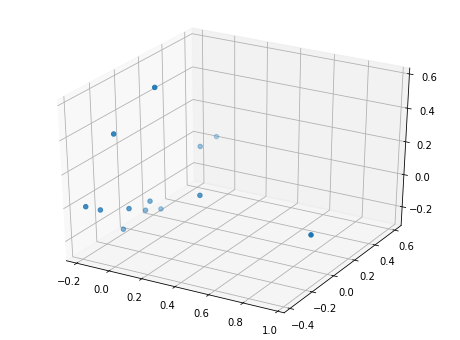

In [73]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_vec[:,0], pca_vec[:,1], pca_vec[:,2])
plt.show()

6. Retrieve 10 movie reviews (or 50 sentences) from the IMDB reviews corpus in NLTK. Extract embedding vectors for each word, then perform k-means clustering using a similarity measure between the vectors (cosine similarity, or the similarity function provided by gensim), and different values for k (k=3,5,) to cluster similar words together. Ignore words which are not found in the embedding space. What clusters do you get?

In [74]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
corpus = nltk.corpus.movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
import string

from nltk.cluster import KMeansClusterer

In [76]:
ids = corpus.fileids()[:20]

words_rev = [w for i in ids for w in corpus.words(i) if w not in stopwords.words("english") + list(string.punctuation)]

In [77]:
embeddings_vec = np.array([embeddings.get_vector(w) for w in words_rev if w in embeddings.vocab])
embeddings_vec.shape

(6513, 300)

In [78]:
clusterer = KMeansClusterer(3, distance=nltk.cluster.util.cosine_distance, repeats=10, avoid_empty_clusters=True)
clusters = clusterer.cluster(embeddings_vec, assign_clusters=True, trace=True)

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 1
iteration
k-means trial 2
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 5
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 6
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means 

In [79]:
means = clusterer.means()
means

[array([-8.79455532e-04,  9.20571212e-04,  1.10105490e-02,  5.54681756e-03,
        -1.31913871e-02, -1.06318574e-02, -6.70699636e-03, -1.11751698e-01,
        -1.48388529e-02,  2.58052815e-03, -3.64428125e-02, -3.83694135e-02,
         2.28128433e-02,  1.59087576e-04, -1.70280412e-02,  6.55541488e-04,
         7.74376094e-02,  1.06147435e-02,  7.36791641e-02,  4.60741902e-03,
        -5.29178302e-04,  6.53269526e-04, -1.02155032e-02,  6.62712380e-02,
        -4.77457000e-03, -6.69591548e-03,  2.47848667e-02,  1.15017230e-02,
         4.66077924e-02,  8.23348993e-04, -1.61490478e-02, -1.77839620e-03,
        -1.67642266e-03, -4.30516601e-02,  1.08995298e-02, -2.11299490e-02,
         8.50453880e-03,  6.03889255e-03, -9.24064592e-03, -7.60975620e-03,
        -1.12509588e-02, -6.17125295e-02, -2.47363485e-02,  8.32640042e-04,
        -4.87297308e-03, -6.84449589e-03,  1.56852752e-02, -1.20832613e-02,
         1.86039582e-02,  2.13271249e-02,  1.90208033e-02, -6.07503636e-04,
         3.8

Clustering using PCA first (for visualization purpose)

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings_vec)
X = pca.transform(embeddings_vec)

In [81]:
clusterer = KMeansClusterer(3, distance=nltk.cluster.util.cosine_distance, repeats=10, avoid_empty_clusters=True)
clusters = clusterer.cluster(X, assign_clusters=True, trace=False)

In [82]:
df = pd.DataFrame(np.array(X), columns=['f1', 'f2'])

In [83]:
from matplotlib.lines import Line2D

colors = ['darkcyan', 'cornflowerblue', 'coral']

In [84]:
df['clusters'] = clusters
df['centroids'] = df['clusters'].apply(lambda x: clusterer.means()[x])
df['c'] = df['clusters'].map({0:'darkcyan', 1:'cornflowerblue', 2:'coral'})

In [85]:
clusterer.means()

[array([-0.00717149, -0.17350581], dtype=float32),
 array([-0.10154473,  0.15210792], dtype=float32),
 array([0.3650505 , 0.01285311], dtype=float32)]

In [86]:
df

,f1,f2,clusters,centroids,c
0,-0.160277,-0.306326,0,"[-0.007171495, -0.17350581]",darkcyan
1,-0.082113,0.161343,1,"[-0.10154473, 0.15210792]",cornflowerblue
2,-0.052756,-0.267436,0,"[-0.007171495, -0.17350581]",darkcyan
3,0.005662,-0.028991,0,"[-0.007171495, -0.17350581]",darkcyan
4,-0.313520,0.633355,1,"[-0.10154473, 0.15210792]",cornflowerblue
...,...,...,...,...,...
6508,0.017134,0.204494,1,"[-0.10154473, 0.15210792]",cornflowerblue
6509,-0.163957,0.265183,1,"[-0.10154473, 0.15210792]",cornflowerblue
6510,-0.052813,-0.059845,0,"[-0.007171495, -0.17350581]",darkcyan
6511,-0.248938,0.167744,1,"[-0.10154473, 0.15210792]",cornflowerblue


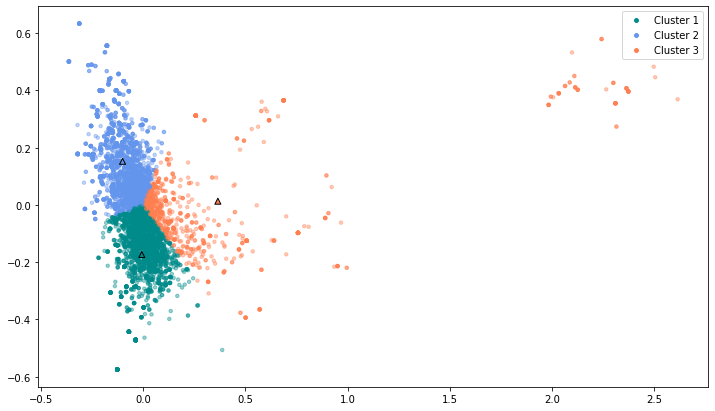

In [87]:
fig, axs = plt.subplots(1, figsize=(12, 7))

# plot data
plt.scatter(df['f1'], df['f2'], c=df['c'], alpha=0.4, s=12)
#plot centroids
cen_x = [centroid[0] for centroid in clusterer.means()]
cen_y = [centroid[1] for centroid in clusterer.means()]
plt.scatter(cen_x, cen_y, marker='^', c=colors, edgecolors='black', linewidths=1)

# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),markerfacecolor=color, markersize=6)
                    for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, loc='upper right')